In [3]:
from sklearn.datasets import load_iris
iris=load_iris()
from sklearn.neighbors import KNeighborsClassifier
X,y=iris.data,iris.target
classifier=KNeighborsClassifier()

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
import numpy as np
rng=np.random.RandomState(0)
permutation=rng.permutation(len(X))
X,y=X[permutation],y[permutation]
print(y)

[0 0 1 1 2 1 1 1 0 2 0 1 0 0 2 2 0 2 1 0 0 0 2 2 2 2 2 0 1 0 1 0 0 0 0 1 1
 1 2 2 1 2 2 0 0 2 2 1 0 2 1 1 0 1 0 1 2 2 0 2 2 2 2 0 1 0 0 2 2 2 0 1 2 1
 2 0 2 1 2 2 0 2 0 1 1 0 0 2 2 1 2 0 1 2 1 1 1 1 1 2 0 0 2 0 2 2 1 0 1 2 2
 1 1 2 0 2 0 2 1 1 1 0 1 0 1 1 1 1 1 0 2 1 2 2 0 0 0 0 2 1 1 0 2 0 1 1 0 0
 1 0]


In [41]:
#implementing cross validation
k=5
n_samples=len(X)
fold_size=n_samples//k
print(fold_size)
scores=[]
masks=[]
for fold in range(k):
    test_mask = np.zeros(n_samples, dtype=bool)
    test_mask[fold * fold_size : (fold+1) * fold_size] = True
    masks.append(test_mask)
    x_test,y_test=X[test_mask],y[test_mask]
    x_train,y_train=X[~test_mask],y[~test_mask]
    classifier.fit(x_train,y_train)
    scores.append(classifier.score(x_test,y_test))

30


In [42]:
print(scores)
print(np.mean(scores))

[1.0, 0.9666666666666667, 0.9333333333333333, 0.9, 1.0]
0.9600000000000002


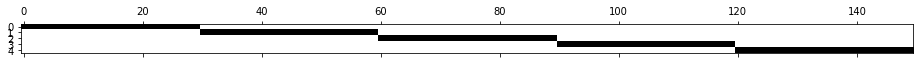

In [44]:
import matplotlib.pyplot as plt
plt.matshow(masks,cmap='gray_r')

In [50]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(classifier,X,y)
print(scores)
print(np.mean(scores))

[0.96078431 0.90196078 1.        ]
0.954248366013072


In [51]:
cross_val_score(classifier,X,y,cv=5)

array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ])

In [52]:
from sklearn.model_selection import KFold,StratifiedKFold,ShuffleSplit


In [55]:
cv=StratifiedKFold(n_splits=5)
for train,test in cv.split(iris.data,iris.target):
    print(test)

[  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
[ 10  11  12  13  14  15  16  17  18  19  60  61  62  63  64  65  66  67
  68  69 110 111 112 113 114 115 116 117 118 119]
[ 20  21  22  23  24  25  26  27  28  29  70  71  72  73  74  75  76  77
  78  79 120 121 122 123 124 125 126 127 128 129]
[ 30  31  32  33  34  35  36  37  38  39  80  81  82  83  84  85  86  87
  88  89 130 131 132 133 134 135 136 137 138 139]
[ 40  41  42  43  44  45  46  47  48  49  90  91  92  93  94  95  96  97
  98  99 140 141 142 143 144 145 146 147 148 149]


In [60]:
def plot_cv(cv,features,labels):
    masks=[]
    for train,test in cv.split(features,labels):
        mask=np.zeros(len(labels),dtype=bool)
        mask[test]=1
        masks.append(mask)
    plt.matshow(masks,cmap='gray_r')    

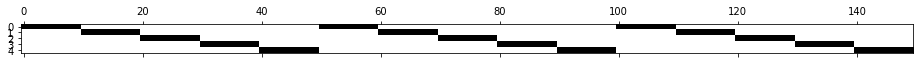

In [61]:
plot_cv(StratifiedKFold(n_splits=5), iris.data, iris.target)

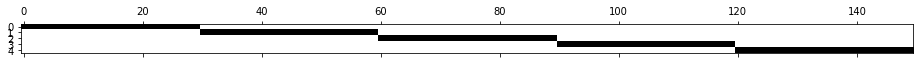

In [63]:
plot_cv(KFold(n_splits=5),iris.data,iris.target)

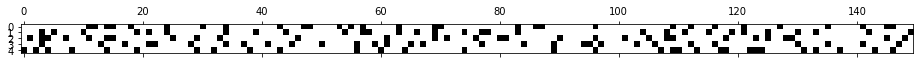

In [64]:
plot_cv(ShuffleSplit(n_splits=5,test_size=0.2),iris.data,iris.target)


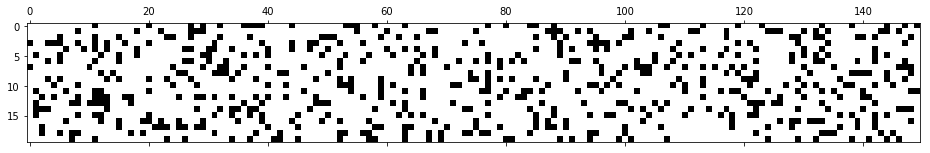

In [65]:
plot_cv(ShuffleSplit(n_splits=20, test_size=.2), iris.data, iris.target)

In [66]:
cv=ShuffleSplit(n_splits=5,test_size=0.2)
cross_val_score(classifier,X,y,cv=cv)

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 0.96666667])

In [70]:
cv=KFold(n_splits=3)
#if u dont shuffle data u will get zero score
cross_val_score(classifier,X,y,cv=cv)

array([0.96, 0.94, 0.98])